En análisis de datos, aproximadamente del 60% al 80% del tiempo es invertido en limpiar y organizar los datos, y con justa razón, pues la limpieza de datos es la etapa previa al interrogatorio que llevaremos a cabo posteriormente para obtener información. Este proceso rara vez se realiza en una sola ocasión, suele ser un proceso iterativo. En esta lectura, abordaremos algunos de los casos más comunes de "datos sucios" y cómo afrontarlos.

Nuestros Paquetes

* import pandas as pd   - Tratamiento de datos

* import numpy as np    - Biblioteca numerica de python

Paquetería nueva

* import [datetime](https://docs.python.org/3/library/datetime.html)       - Manejo y tratamiento de Fechas
* import [chardet ](https://pypi.org/project/chardet/)       - Modulo de Encoding para caracteres    



Nuestros Datasets

* Dataset Derrumbes By NASA (https://www.kaggle.com/nasa/landslide-events)
* Dataset Terremotos By Us Geological Survey (https://www.kaggle.com/usgs/earthquake-database)
* Dataset Fifa By Karan Gadiya (https://www.kaggle.com/karangadiya/fifa19/)
* Dataset Adult By Ronny Kohavi and Barry Becker (http://archive.ics.uci.edu/ml/datasets/Adult)
* Dataset Kickstarter By Mickaël Mouillé obtained with Kickstarter Platform API (https://www.kaggle.com/kemical/kickstarter-projects)

In [1]:
import pandas as pd
import numpy as np
import datetime
import chardet
import seaborn as sn
import matplotlib.pyplot as plt

### 1. Leer datasets

In [2]:
earthquakes = pd.read_csv('D:/DEV.F/Modulo 2/datasets/terremotos.csv')
derrumbes = pd.read_csv('D:/DEV.F/Modulo 2/datasets/derrumbes.csv')
fifa = pd.read_csv('D:/DEV.F/Modulo 2/datasets/fifa.csv')
fifaM = pd.read_csv('D:/DEV.F/Modulo 2/datasets/fifaM.csv')
adult = pd.read_csv('D:/DEV.F/Modulo 2/datasets/adult.csv')
chavos_prepa = pd.read_csv('D:/DEV.F/Modulo 2/datasets/snsdata.csv')
accounts = pd.read_csv('D:/DEV.F/Modulo 2/datasets/accounts.csv')

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,2,4,8,9,14,16,17,18,23,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## ¿Cómo manejar y transformar las fechas?

Primero vamos a ver en qué formato están guardadas con 
[.dtype ](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

Data type objects

* 'b'       boolean
* 'i'       (signed) integer
* 'u'       unsigned integer
* 'f'       floating-point
* 'c'       complex-floating point
* 'O'       (Python) objects
* 'S', 'a'  (byte-)string
* 'U'       Unicode
* 'V'       raw data (void)


In [3]:
derrumbes.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

In [4]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [5]:
derrumbes.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [6]:
derrumbes.tail()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...
1692,7541,3/2/16,8:00,NaN,United States,US,Vermont,2066,Windsor,1.78429,...,"(43.4771, -72.406599999999997)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Valley News,http://www.vnews.com/home/21353539-95/loose-ledge


In [7]:
# dtype: object Pandas usa el Object para referirse a varios tipos de datos pero normalmente son strings
derrumbes['date'].dtype

dtype('O')

[**to_datetime()** ](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) es un método que ayuda a convertir string en un formato de date que puede leer python como fechas

**Syntax**:

pandas.to_datetime(arg, format=None, ...)

 
Parameters:

* arg: An integer, string, float, list or dict object to convert in to Date time object.
* format: String input to tell position of day, month and year.

In [8]:
derrumbes['date']=pd.to_datetime(derrumbes['date'],format='%m/%d/%y')

In [9]:
derrumbes['date'].dtype

dtype('<M8[ns]')

In [10]:
derrumbes['date'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [11]:
#existen registros con fechas nulas?
dias_de_derrumbes=derrumbes['date'].dt.day

In [12]:
derrumbes['date'].isnull().sum()
dias_de_derrumbes=dias_de_derrumbes.dropna()

In [13]:
#Podemos interactuar con las partes de la fecha
derrumbes['date'].dt.day.iloc[0]

2.0

Text(0.5, 1.0, 'Distribucion de Dias de Derrumbes')

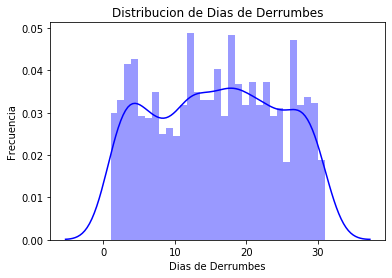

In [30]:
# Grafiquemos para double-check
# doesn't hurt to double-check that the days of the month we've extracted make sense.
sn.distplot(dias_de_derrumbes, kde=True, bins=31,color='blue',label='Dias de Derrumbes')
plt.xlabel('Dias de Derrumbes')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Dias de Derrumbes')

* Crea una nueva columna llamada 'mes_derrumbes' que muestre los meses de la columna date_parsed en que sucedieron los derrumbes.
* Después muestra de esa columna los datos del mes.

c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribucion de Meses de Derrumbes')

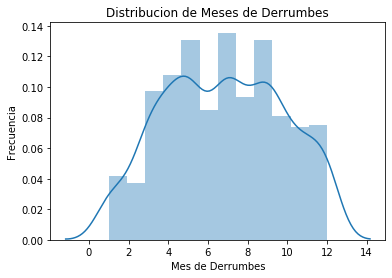

In [31]:
mes_derrumbes=derrumbes['date'].dt.month
sn.distplot(mes_derrumbes,bins=12)
plt.xlabel('Mes de Derrumbes')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Meses de Derrumbes')

### ¿Qué pasa si la fecha de un Dataset viene en varios Formatos???


Entonces usaremos el parámetro de **infer_datetime_format=True**
de la función **to_datetime**

In [ ]:
accounts.head()

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568


In [ ]:
accounts.columns

Index(['Unnamed: 0', 'id', 'date_opened', 'total'], dtype='object')

In [ ]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
Unnamed: 0     98 non-null int64
id             98 non-null object
date_opened    98 non-null object
total          98 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


In [ ]:
accounts['date_opened'].head()

0          2003-10-19
1    October 05, 2018
2          2008-07-29
3          2005-06-09
4          2012-03-31
Name: date_opened, dtype: object

In [ ]:
accounts['date_opened']=pd.to_datetime(accounts['date_opened'],infer_datetime_format=True)
accounts['date_opened'].head()

0   2003-10-19
1   2018-10-05
2   2008-07-29
3   2005-06-09
4   2012-03-31
Name: date_opened, dtype: datetime64[ns]

### Remover y reemplazar  y modificar caracteres no deseados
Otro problema común es la presencia de caracteres que no deseamos en nuestros valores. Estos pueden constituir alguno de los siguientes casos:
 - Caracteres erróneos introducidos por error humano o error de máquina al realizar los registros.
 - Caracteres que fueron introducidos para indicar una divisa, unidad de medida, categoría, etc. O bien para simplificar los datos.
 - Caracteres erróneos introducidos por una cambio en la codificación de nuestro sistema respecto a la codificación de los datos.

In [ ]:
#por ejemplo en esta dataset http://archive.ics.uci.edu/ml/datasets/Adult
adult.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
adult.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
adult=adult.rename(columns={' State-gov':'State gov',' Bachelors':'Bachelors',' Never-married':'Never married',
    ' Adm-clerical':'Adm clerical',' Not-in-family':'Not in family',' White':'skin',' Male':'Sex',' United-States':'country',' <=50K':'Ingresos'})

In [ ]:
adult.drop(columns=['39',' 77516',' 13',' 2174',' 0',' 40'])

,State gov,Bachelors,Never married,Adm clerical,Not in family,skin,Sex,country,Ingresos
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
5,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
7,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
8,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
9,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,>50K


#### Otros tipos de caracteres no deseados

In [ ]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [15]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [16]:
fifa['Wage'].head(15)

0     €565K
1     €405K
2     €290K
3     €260K
4     €355K
5     €340K
6     €420K
7     €455K
8     €380K
9      €94K
10    €205K
11    €355K
12    €125K
13    €285K
14    €225K
Name: Wage, dtype: object

In [17]:
fifa['Wage'].describe()

count     18207
unique      144
top         €1K
freq       4900
Name: Wage, dtype: object

In [18]:
#tomamos un diccionario lo tratamos como una "tabla de traduccion/sustitucion/remplazo"
#con los ascii codes del simbolo € y la letra K con la funcion ord
mi_diccionario = {ord('€'): None, ord('K'): '000', }

#Otras 2 formas de ponerlo:
#mi_diccionario_mas_largo = {8364: None, 75: None }
#mi_diccionario_elegante = {ord(i): None for i in '€K'}


fifa['wage_trimmed'] = fifa['Wage'].str.translate(mi_diccionario)    
fifa['wage_trimmed']

0        565000
1        405000
2        290000
3        260000
4        355000
5        340000
6        420000
7        455000
8        380000
9         94000
10       205000
11       355000
12       125000
13       285000
14       225000
15       205000
16       205000
17       145000
18       240000
19       240000
20       315000
21       200000
22       130000
23       300000
24       215000
25       100000
26       255000
27       285000
28       315000
29       165000
          ...  
18177      1000
18178      1000
18179      1000
18180      1000
18181      1000
18182      1000
18183      1000
18184      1000
18185      1000
18186      1000
18187      1000
18188      1000
18189      1000
18190      1000
18191      1000
18192      1000
18193      1000
18194      1000
18195      1000
18196      1000
18197      1000
18198      1000
18199      1000
18200      1000
18201      1000
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: wage_trimmed, Leng

In [19]:
fifa['Wage']=fifa['wage_trimmed'].astype(int)
fifa['Wage'].head()

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int32

In [20]:
fifaM.columns

Index(['Unnamed: 0', 'X', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club.Logo', 'Value', 'Wage', 'Special',
       'Preferred.Foot', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Work.Rate', 'Body.Type', 'Real.Face', 'Position',
       'Jersey.Number', 'Joined', 'Loaned.From', 'Contract.Valid.Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'Sli

In [21]:
fifaM['Release.Clause']

0        €565M
1        €405M
2        €290M
3        €260M
4        €355M
5        €340M
6        €420M
7        €455M
8        €380M
9         €94M
10       €205M
11       €355M
12       €125M
13       €285M
14       €225M
15       €205M
16       €205M
17       €145M
18       €240M
19       €240M
20       €315M
21       €200M
22       €130M
23       €300M
24       €215M
25       €100M
26       €255M
27       €285M
28       €315M
29       €165M
         ...  
18177    €193K
18178     €94K
18179    €119K
18180     €78K
18181    €109K
18182    €101K
18183      NaN
18184     €78K
18185     €88K
18186    €167K
18187     €66K
18188    €143K
18189    €125K
18190    €165K
18191    €119K
18192    €119K
18193     €99K
18194    €109K
18195    €153K
18196    €113K
18197     €88K
18198    €165K
18199    €175K
18200    €143K
18201    €153K
18202    €143K
18203    €113K
18204    €165K
18205    €143K
18206    €165K
Name: Release.Clause, Length: 18207, dtype: object

In [22]:
dic={ord('M'):'000000',ord('K'):'000',ord('€'):None,ord('.'):None}
fifaM['Release.Clause']=fifaM['Release.Clause'].str.translate(dic)
fifaM['Release.Clause'].head()

0    565000000
1    405000000
2    290000000
3    260000000
4    355000000
Name: Release.Clause, dtype: object

In [23]:
clausulas=fifaM['Release.Clause']
clausulas=clausulas.dropna()
clausulas=clausulas.astype(int)
clausulas.head()

0    565000000
1    405000000
2    290000000
3    260000000
4    355000000
Name: Release.Clause, dtype: int32

In [24]:
##Police=pd.read_csv("D:/DEV.F/Modulo 2/datasets/PoliceKillingsUS.csv")
#Aquí entra chardet al rescate para ayudarnos a encontrar cuál es la codificación
#de nuestro archivo
with open("D:/DEV.F/Modulo 2/datasets/PoliceKillingsUS.csv", 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [25]:
Police=pd.read_csv("D:/DEV.F/Modulo 2/datasets/PoliceKillingsUS.csv",encoding='Windows-1252')

Ahora te toca a ti!

Intentalo con los datos de kickstarter-encoding

In [26]:
kickstart=pd.read_csv("D:/DEV.F/Modulo 2/datasets/kickstart-encoding.csv")

FileNotFoundError: [Errno 2] File b'D:/DEV.F/Modulo 2/datasets/kickstart-encoding.csv' does not exist: b'D:/DEV.F/Modulo 2/datasets/kickstart-encoding.csv'

In [ ]:
with open("D:/DEV.F/Modulo 2/datasets/kickstarter-encoding.csv", 'rb') as kickraw:
    kickresult = chardet.detect(kickraw.read(100000))
    print(kickresult)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [27]:
kickstart=pd.read_csv("D:/DEV.F/Modulo 2/datasets/kickstarter-encoding.csv",encoding='Windows-1252')

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
kickstart.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


## Valores Fuera de Rango y valores perdidos
Cuando hacemos limpieza de datos, siempre es necesario recurrir a nuestro conocimiento del tema y del origen de la base de datos para saber si estos tienen sentido. A veces puede ser algo tan complicado como cuadrar cantidades que cambian en el tiempo respecto de otras 2 o 3 variables, o puede ser algo más del "sentido común" como identificar que un valor negativo en una columna de edades constituye una anomalía.

In [32]:
#Chequemos lo que trae el archivo snsdata.csv. Recuerda que lo leimos al inicio
#y está en la variable 'chavos_prepa'
chavos_prepa.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [35]:
print(f"{chavos_prepa.info()} \n")
chavos_prepa['age'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [38]:
! pip install -U seaborn --user


  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl


c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


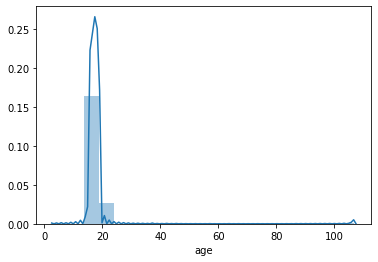

In [43]:
sn.distplot(chavos_prepa['age'],kde=True,bins=20)

In [46]:
limite_sup=19.0
limite_inf=14.0

In [78]:
chavos_prepa['age_t']=np.where(chavos_prepa['age']<limite_inf,np.random.randint(limite_inf,limite_sup),chavos_prepa['age'])
chavos_prepa['age_t']=np.where(chavos_prepa['age']>limite_sup,np.random.randint(limite_inf,limite_sup),chavos_prepa['age_t'])


In [79]:
chavos_prepa['age_t'].describe()

count    24914.000000
mean        17.034457
std          1.081449
min         14.000000
25%         16.005000
50%         17.002000
75%         17.969000
max         18.998000
Name: age_t, dtype: float64

In [80]:
valores_nulos=chavos_prepa['age_t'].isnull().sum()
valores_no_nulos=len(chavos_prepa)
porcentaje_nulos=(100*valores_nulos)/valores_no_nulos
print(f" {round(porcentaje_nulos,2)}% de los valores son nulos")

 16.95% de los valores son nulos


In [81]:
#Al ser un porncentaje de valores nulos considerablemente alto, no podemos eliminar tantos registros
#como nos gustaría, por lo que lo que hacemos es reemplazar los valores nulos por el valor promedio de los valores no nulos
chavos_prepa['age_t']=np.where(chavos_prepa['age_t'].isnull(),chavos_prepa['age_t'].mean(),chavos_prepa['age_t'])
chavos_prepa['age_t'].describe()

count    30000.000000
mean        17.034457
std          0.985521
min         14.000000
25%         16.218250
50%         17.034457
75%         17.760000
max         18.998000
Name: age_t, dtype: float64

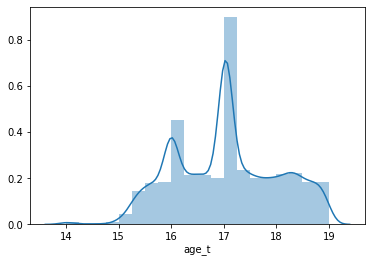

In [82]:
sn.distplot(chavos_prepa['age_t'],kde=True,bins=20)

### Uniformidad de tipo de cambio

In [84]:
accounts.head()

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568


In [87]:
accounts['date_opened']=pd.to_datetime(accounts['date_opened'],infer_datetime_format=True)
accounts['date_opened'].head()

0   2003-10-19
1   2018-10-05
2   2008-07-29
3   2005-06-09
4   2012-03-31
Name: date_opened, dtype: datetime64[ns]

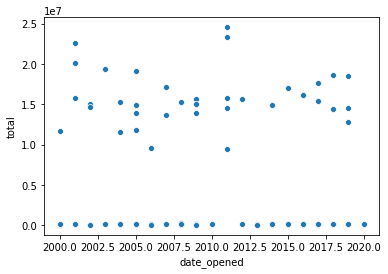

In [88]:
# Graficamos la fecha de apertura de las cuentas VS el monto de la cuenta.
# Observa cómo algunas cuentas tiene cantidades estratosféricas y otras no.
# Podemos inferir que las cuentas con montos enormes están en Yenes.
sn.scatterplot(x=accounts['date_opened'].dt.year,y=accounts['total'])

In [90]:
# Ahora, necesitamos saber en qué ciudad fue abierta cada cuenta para obtener 
# así en qué moneda está el monto de la cuenta.
# Para esto, tenemos un dataset con las oficinas de New York y Tokyo asociadas
# IDs de las cuentas.
account_offices = pd.read_csv('D:/DEV.F/Modulo 2/datasets/account_offices.csv')

#account_offices.info()
account_offices

,id,office
0,A880C79F,New York
1,BE8222DF,New York
2,19F9E113,Tokyo
3,A2FE52A3,Tokyo
4,F6DC2C08,New York
5,D2E55799,Tokyo
6,53AE87EF,Tokyo
7,3E97F253,Tokyo
8,4AE79EA1,Tokyo
9,2322DFB4,New York


In [92]:
# Sabemos que account_offices tiene una columna de id. ¿Será que coincida con
# los id de las cuentas?
# Hagamos un MERGE entre los dos dataset mediante su columna en común.
# Un MERGE en Pandas es equivalente al JOIN en SQL.
# Vamos a asumir que la fórmula para convertir USD a JPY es USD = JPY / 104.
accounts_global = pd.merge(accounts, account_offices, on="id")
accounts_global.head()

,Unnamed: 0,id,date_opened,total,office
0,1,A880C79F,2003-10-19,169305,New York
1,2,BE8222DF,2018-10-05,107460,New York
2,3,19F9E113,2008-07-29,15297152,Tokyo
3,4,A2FE52A3,2005-06-09,14897272,Tokyo
4,5,F6DC2C08,2012-03-31,124568,New York


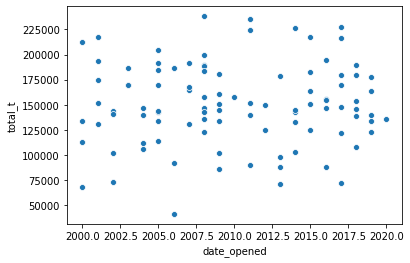

In [94]:
accounts_global['total_t']=np.where(accounts_global['office']=='Tokyo',accounts_global['total']/104,accounts_global['total'])
sn.scatterplot(x=accounts_global['date_opened'].dt.year,y=accounts_global['total_t'])

### Datos duplicados
Este problema se divide en dos tipos

     - Duplicados totales
     - Duplicados parciales


In [96]:
# Cargamos la base de datos letter.csv
# Emula una lista de clientes y sus pagos a cierto curso.
# column1: cliente, column2: curso, column3: pago
letter = pd.read_csv('D:/DEV.F/Modulo 2/datasets/letters.csv')

In [97]:
letter.head()

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000


In [99]:
#Detectamos duplicado en el df y los contamos
letter.duplicated().sum()

2

In [102]:
letter.drop_duplicates(inplace=True)

In [103]:
letter.duplicated().sum()

0